In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import seaborn as sns
import math
import json

In [17]:
#Model Variables and Parameters
average_age=20
# Average ages in base year for underground and overhead distribution lines (in years)
age_shape=10
# We selected age shape and scale in a way that age_shape*age_scale=average_age
age_scale=2
# We selected age shape and scale in a way that age_shape*age_scale=average_age
length_shape=2
# We selected length shape and scale in a way that length_shape*length_age=average_length
length_scale=0.25
# We selected age shape and scale in a way that length_shape*age scale=average_length
average_length=0.5
# Average length for underground and overhead distribution lines (in miles)
segment_number= 625
# Numbers of line segments in the network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach segment's length is considered about 0.5 miles. So by dividing (91.5+121.7)/.5 we calculated this parameter.
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
overhead_baseyear=191
#Length of overhead lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514/255
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
# change underground corridor width to 144
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':40,'replcost':357000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':144,'over_under_raplcost':357000}
# the above two dictionaries shows related parameters for overhead and underground lines and the parameters are as follows:
#lifespan=Useful lifespan of overhead line and underground lines
#replcost=Cost associated with replacing a line with the same line type after it reaches its life span. 
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of line
# corridor_length= length of the corridor in feet needed for calculating environmental cost.
# over_under_raplcost= replacement cost associated with replacing an overhead line with an underground line.
###

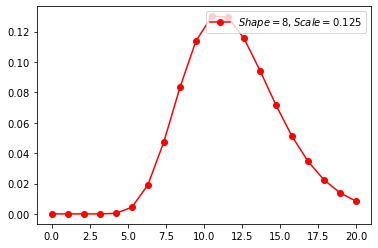

In [4]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segment age

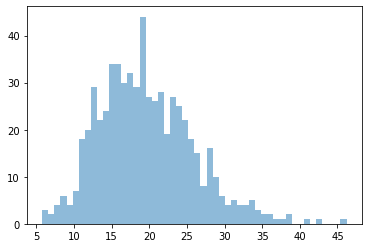

[21.0992462  16.65373888 11.82660626 26.9714241  31.73869715 10.90743652
 13.19323025 13.75988444 20.66532799 19.52500839 19.71594354 10.37798929
 16.5151409  30.10667174 34.37657715 24.39229706 12.20350325 18.81389366
 15.63086076 15.11260197 31.84430638  6.57685396 10.01761448 21.37527779
 11.82420722 12.52787766 30.10537491 20.07909272 19.92888215 15.38800709
 16.73049951 13.07626453 23.63240141 18.04128717 27.55415028 22.95759626
 33.61467602 24.35402986 12.72508546 16.534024   17.42386104 11.6766796
 30.92377475 12.88350248 17.24943869 20.60263145 22.41302724 25.05170168
 16.9825415  25.032464   11.87129408 10.13594999 17.39451442 26.77635018
 35.99895085 31.98304879 27.42398768 21.4810713  18.11957106 18.22451635
 23.87497434 26.23966434 17.91251666 32.86727582  9.50113377 19.87600874
 23.65194309  9.14707182 16.14207164 27.2158857  20.06913917 23.40896707
 16.99436859 16.21822736 22.94044039 24.25037728 25.67178615 24.86922018
 10.77982265 20.74781653 23.67426267 15.88375865 28.

In [5]:
age=np.random.gamma(age_shape,age_scale,segment_number)
plt.hist(np.random.gamma(age_shape,age_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined segment's ages in the base year

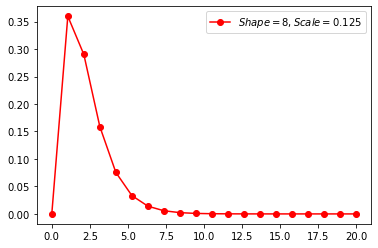

In [6]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segments length
#length_shape*length_scale=average_length=0.5

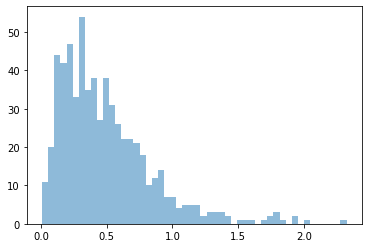

[1.01859412 0.91107633 0.81098481 1.08378332 0.12297443 0.37163525
 0.15087949 0.55076206 0.63484485 0.53648784 0.47233898 0.32219334
 0.9358837  0.17410929 0.36974926 0.26302056 0.15668607 0.49496955
 0.14610724 0.34091789 0.46970127 0.29058383 0.07025226 0.21756417
 0.0431803  0.37255719 0.15561582 0.33018304 0.18062345 0.96599748
 0.95186273 0.33965268 0.31201705 0.5767848  0.27584785 0.42899138
 0.73873225 0.97341098 0.17692797 0.78631105 0.2581037  0.19009975
 0.41064294 0.39151338 1.26499859 0.37662975 0.75735925 1.66272682
 0.38903225 0.1707715  1.11936627 0.71153784 0.27747364 0.45993282
 1.35460634 0.62205995 0.49706046 0.43290819 0.64872413 0.86444955
 1.78770012 1.02193107 0.22024171 0.39562927 0.4135454  0.60900777
 0.47652567 0.47012069 0.33778197 0.18586395 0.19678231 0.9676218
 0.36472963 0.55275096 0.49036891 0.14283409 1.63434266 0.4494009
 1.11983565 0.63957085 0.69988147 0.19445864 0.06568886 0.47820491
 0.49070961 0.15617262 1.35479084 0.26480295 0.14714117 0.077161

In [7]:
length=np.random.gamma(length_shape,length_scale,segment_number)
plt.hist(np.random.gamma(length_shape,length_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [8]:
#Defining Line segment class with required attributes and methods and these methods are going to be modified based on requirements for each strategies in the simulations.
class Line_segment:
    ## The __init__ function as the constructor, which assigns random length, age and underground status for the base year to each line segment.
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.calculate_opex()]
        self.environmental_restoration=[]
    ###Lifecycle Infrastructure Costs:
    # Add one year to the age of line segment,compare it to the lifespan, starts from 1 when reaches to lifespan and append this age to age list. Also append underground status to its list.
    def update_age_and_underground_statusQuo(self):
        if self.underground[-1]==1:
            lifespan_current= int(underground_line['lifespan'])
        else:
            lifespan_current= int(overhead_line['lifespan'])
        age_current=self.age[-1]
        if age_current<(lifespan_current-1):
            age_current+=1
            self.age.append(age_current)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
            
    def update_age_and_underground_under_after_lifespan(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    
    #Add interest rate to the replacement cost and also cansider different replacementcost rate when underground=1        
    def add_replcost_intrest_rate(self):
        underground_current=self.underground[-1]
        underground_baseyear=self.underground[0]
        if underground_current==1:
            replcost_growth_rate_current=underground_line['replcost_growth_rate']
        else:
            replcost_growth_rate_current=overhead_line['replcost_growth_rate']
        if underground_current==underground_baseyear:        
            replcost_new=(self.replcost_rate[-1])+((replcost_growth_rate_current)*(self.replcost_rate[-1]))
            self.replcost_rate.append(replcost_new)
        else:
            replcost_new=underground_line['replcost']*((1+replcost_growth_rate_current)**(len(self.underground)-1))
            self.replcost_rate.append(replcost_new)
        return(self.replcost_rate)
    
    #Determine capital expenses which is replacement cost for each line segment based on the rate of replacement cost in that year and length of the circuit.
    def calculate_capex(self):
        if (self.age[-1])==1:
            length_current=self.length
            replcost_rate_current=self.replcost_rate[-1]
            replcost_new=(replcost_rate_current)*(length_current)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    
    #Determin operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def calculate_opex(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_percentage_replcost_current=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_current=overhead_line['om_percentage_replcost']
        length_current=self.length
        replcost_rate_current=self.replcost_rate[-1]
        opex=(om_percentage_replcost_current)*(length_current)*(replcost_rate_current)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    
    #Add interest rate to opex.
    def add_opex_interest_rate(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)

    #Determin the first retirement year
    def determine_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
 
    ###Environmental Costs:
    #Determin environmental restoration cost based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    def calculate_environmental_restoration(self):
        environmental_restoration_current=0
        if self.underground[-1]==1:
            if self.underground[0]==1:
                corridor_length=overhead_line['corridor_length']
                self.environmental_restoration.append(environmental_restoration_current)
            else:
                corridor_length=underground_line['corridor_length']-overhead_line['corridor_length']
                environmental_restoration_current=((self.length)*(corridor_length)*640/5280*easment_value)
                self.environmental_restoration.append(environmental_restoration_current)
        else:
            corridor_length=underground_line['corridor_length']
            self.environmental_restoration.append(environmental_restoration_current)
        return(self.environmental_restoration)

    
    ###Safety and health Costs:
    #Return fatal cost which is one element of safety cost
    def calculate_non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    
    #Return non-fatal cost which is one element of safety cost
    def calculate_fatal_cost(self):
        return(fir*employees/100000*vsl)

In [9]:
#run simulation for calculating cost elemnts of statusQuo strategy and assign a data frame to them.
def run_cost_simulation_statusQuo_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_statusQuo
    global net_present_value_statusQuo
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_statusQuo()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array[t]+line_segment_fatal_cost_array[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_statusQuo=pd.DataFrame([range(years_of_analysis), line_segment_underground_length_total_array,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array,line_segment_non_fatal_cost_array,line_segment_fatal_cost_array,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_statusQuo['year'] = df_cost_line_segment_statusQuo['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_statusQuo_strategy_cost=[]
    for index, row in df_cost_line_segment_statusQuo.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_statusQuo_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_statusQuo_strategy_cost)
    net_present_value_statusQuo=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    net_present_value_statusQuo.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    #print(df_line_segment_array)
    #print(net_present_value_statusQuo)
    #print(df_cost_line_segment_statusQuo)

In [10]:
run_cost_simulation_statusQuo_strategy(40)

In [11]:
df_line_segment_array

,length,base year age,base year underground
0,0.375080,31.278698,1.0
1,0.942852,7.169208,0.0
2,0.319266,31.121340,0.0
3,1.199188,19.812443,1.0
4,0.401184,24.964239,0.0
...,...,...,...
620,0.499679,15.832261,0.0
621,0.190529,23.283163,1.0
622,0.068784,16.763384,0.0
623,1.031227,12.486708,0.0


In [12]:
df_cost_line_segment_statusQuo

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,205.0,0.000000e+00,2.899501e+05,2.899501e+05,0.0,91611.240988,34556.823529,126168.064518,4.161181e+05
1,1,0.0,2.165857e+05,3.044476e+05,5.210333e+05,0.0,91611.240988,34556.823529,126168.064518,6.472013e+05
2,2,0.0,0.000000e+00,3.196700e+05,3.196700e+05,0.0,91611.240988,34556.823529,126168.064518,4.458380e+05
3,3,0.0,4.939538e+05,3.356534e+05,8.296073e+05,0.0,91611.240988,34556.823529,126168.064518,9.557753e+05
4,4,0.0,2.203720e+05,3.524361e+05,5.728081e+05,0.0,91611.240988,34556.823529,126168.064518,6.989762e+05
5,5,0.0,4.669217e+05,3.700579e+05,8.369796e+05,0.0,91611.240988,34556.823529,126168.064518,9.631477e+05
6,6,0.0,0.000000e+00,3.885608e+05,3.885608e+05,0.0,91611.240988,34556.823529,126168.064518,5.147289e+05
7,7,0.0,4.135132e+05,4.079889e+05,8.215020e+05,0.0,91611.240988,34556.823529,126168.064518,9.476701e+05
8,8,0.0,7.046040e+05,4.283883e+05,1.132992e+06,0.0,91611.240988,34556.823529,126168.064518,1.259160e+06
9,9,0.0,7.133354e+05,4.498077e+05,1.163143e+06,0.0,91611.240988,34556.823529,126168.064518,1.289311e+06


In [13]:
net_present_value_statusQuo

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.249611e+07,0.0,1.357184e+06,1.385330e+07


In [14]:
#run simulation for calculating cost elemnts of undergrounding after lifespan strategy and assign a data frame to them.
def run_cost_simulation_under_after_lifespan_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_under_after_lifespan
    global df_net_present_value_under_after_lifespan
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    environmental_restoration_cost=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    #underground_length_new=[]
    underground_total=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_under_after_lifespan()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
            line_segment_environmental_restoration_cost_array[t]+=line_segment_array[i].environmental_restoration[t] 
            
    #Generating underground length new array
    underground_length_new=[0 for t in range (years_of_analysis)]
    for i in range (len(line_segment_array)):
        first_retire=line_segment_array[i].determine_first_retire()
        length=line_segment_array[i].length
        if int(first_retire)>years_of_analysis-1:
            pass
        else:
            if line_segment_array[i].underground[0]==0:
                underground_length_new[int(first_retire)]+=length
            if line_segment_array[i].underground[0]==1:
                underground_length_new[int(first_retire)]+=0
    zipped_lists = zip(line_segment_underground_length_total_array,underground_length_new)
    underground_length_total = [x + y for (x, y) in zipped_lists]
    new_underground_length_total=[]
    cumsum=0
    for ele in underground_length_total:
        cumsum+=ele
        new_underground_length_total.append(cumsum)
    underground_increase_rate=[1]
    for i in range (1,  len(new_underground_length_total)):
        devided= ((new_underground_length_total[i])/(new_underground_length_total[i-1]))
        underground_increase_rate.append(devided)
    line_segment_environmental_restoration_cost_array_multiply_new_under=[]
    for num1, num2 in zip(line_segment_environmental_restoration_cost_array, underground_length_new):
        line_segment_environmental_restoration_cost_array_multiply_new_under.append(num1 * num2)      
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_non_fatal_cost_array, underground_increase_rate):
        line_segment_non_fatal_cost_array_under.append(num1 * num2)
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_fatal_cost_array, underground_increase_rate):
        line_segment_fatal_cost_array_under.append(num1 * num2)
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array_under[t]+line_segment_fatal_cost_array_under[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array_multiply_new_under[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_under_after_lifespan=pd.DataFrame([range(years_of_analysis), new_underground_length_total,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array_multiply_new_under,line_segment_non_fatal_cost_array_under,line_segment_fatal_cost_array_under,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_under_after_lifespan.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_under_after_lifespan['year'] = df_cost_line_segment_under_after_lifespan['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_under_after_lifespan_strategy_cost=[]
    for index, row in df_cost_line_segment_under_after_lifespan.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_under_after_lifespan_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_under_after_lifespan_strategy_cost)
    df_net_present_value_under_after_lifespan=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    df_net_present_value_under_after_lifespan.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    print (total_total)
    #print(df_line_segment_array)
    #print(df_cost_line_segment_under_after_lifespan)
    #print(df_net_present_value_under_after_lifespan)

In [15]:
run_cost_simulation_under_after_lifespan_strategy(40)

19227422.24102452


In [25]:
df_line_segment_array

,length,base year age,base year underground
0,0.225738,14.731749,1.0
1,0.393963,15.801804,1.0
2,0.230192,22.443022,0.0
3,1.338145,12.747211,1.0
4,0.730179,21.059207,1.0
...,...,...,...
620,0.094513,22.820023,0.0
621,0.446444,20.714079,0.0
622,0.897063,17.769020,0.0
623,0.465529,22.937441,1.0


In [26]:
df_cost_line_segment_under_after_lifespan

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,213.000000,0.000000e+00,3.633778e+05,3.633778e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.895458e+05
1,1,213.000000,1.622680e+05,3.815466e+05,5.438147e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,6.699827e+05
2,2,213.000000,5.525514e+04,4.006240e+05,4.558791e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.820472e+05
3,3,213.000000,0.000000e+00,4.206552e+05,4.206552e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.468232e+05
4,4,213.000000,5.149343e+05,4.416879e+05,9.566222e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,1.082790e+06
5,5,213.000000,6.055277e+05,4.637723e+05,1.069300e+06,0.000000e+00,91611.240988,34556.823529,126168.064518,1.195468e+06
6,6,213.000000,0.000000e+00,4.869609e+05,4.869609e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,6.131290e+05
7,7,213.000000,3.982136e+05,5.113090e+05,9.095226e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,1.035691e+06
8,8,213.000000,3.217439e+05,5.368744e+05,8.586184e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,9.847864e+05
9,9,213.000000,1.750834e+06,5.637182e+05,2.314552e+06,0.000000e+00,91611.240988,34556.823529,126168.064518,2.440720e+06


In [27]:
df_net_present_value_under_after_lifespan

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.661157e+07,2.875238e+06,1.359112e+06,2.084592e+07
